In [1]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, input_list, target_list):
        # convert input lists into 2d array
        inputs = numpy.array(input_list, ndmin=2).T
        targets = numpy.array(target_list, ndmin=2).T
        
        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        #calculate output from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #caclulate inputs in final layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        #calculate outputs from final layer
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error ( target-actual)
        output_errors = targets - final_outputs
        
        #hidden layer error is output_errors, split by weihgts recombined ar hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update the wheigts for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #update the wheigts for the links between hidden and input layers 
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    def query(self, input_list):
        #input array in 2d array
        inputs = numpy.array(input_list).T
        
        #signals in hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        #emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        #calculate the signals emerging from output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        pass
    
    

In [2]:
import scipy.special

In [3]:
import numpy


In [11]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [32]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes , output_nodes, learning_rate)

training_data_file = open("Dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#daten vorbereiten
for record in training_data_list:
    #kommas weg
    all_values = record.split(',')
    #inputs zwischen 0.01 und 0.99 skalieren
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #create target output value. The Target should be 0.99
    targets = numpy.zeros(output_nodes) + 0.01
    
    #all_values[0] is the target value 
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    

In [33]:
training_data_file = open("Dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()



In [50]:
all_values = training_data_list[90].split(',')
print(all_values[0])

6


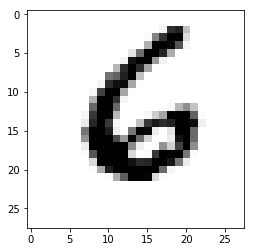

In [51]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [52]:
n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

array([0.02949436, 0.01884388, 0.06083528, 0.01603316, 0.10512573,
       0.00513333, 0.9183692 , 0.04012132, 0.04019609, 0.00243638])